In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df = pd.read_csv("/content/BlackFriday.csv")

In [37]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [38]:
df.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2             7366
Product_Category_3            16155
Purchase                          1
dtype: int64

In [39]:
df = df.drop('Product_Category_2' ,axis=1)
df = df.drop('Product_Category_3' ,axis=1)


In [40]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category_1            1
Purchase                      1
dtype: int64

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [42]:
for columns in df.columns:
  print(columns , df[columns].nunique())

User_ID 3177
Product_ID 2772
Gender 2
Age 8
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 8924


In [43]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [44]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', '26-'],
      dtype=object)

In [45]:
df['City_Category'].unique()

array(['A', 'C', 'B', nan], dtype=object)

In [46]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [47]:
df["Marital_Status"].unique()

array([ 0.,  1., nan])

In [48]:
df['Purchase'].sum()

213290174.0

# **ANALYSIS BASED ON GENDER**

In [49]:
df["Gender"].value_counts()

Gender
M    17507
F     5580
Name: count, dtype: int64

<Axes: title={'center': 'GENDER RATIO'}, ylabel='count'>

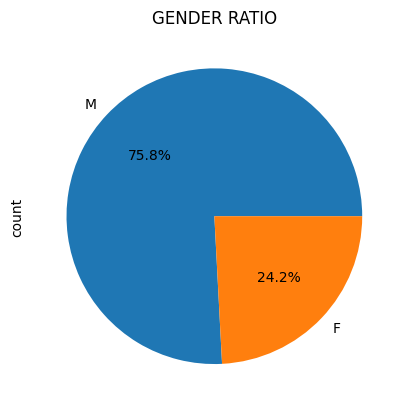

In [50]:
df["Gender"].value_counts().plot(kind="pie" , autopct = "%1.1f%%" , title = "GENDER RATIO")

In [51]:
df.groupby("Gender").sum()["Purchase"]

Gender
F     48731198.0
M    164558976.0
Name: Purchase, dtype: float64

<Axes: title={'center': 'TOTAL PURCHASE AMOUNT RATIO'}, ylabel='Purchase'>

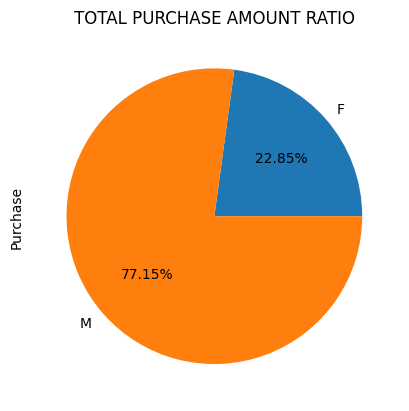

In [52]:
df.groupby("Gender").sum()["Purchase"].plot(kind="pie" , autopct  = "%2.2f%%" , title = "TOTAL PURCHASE AMOUNT RATIO")

<Axes: xlabel='Gender', ylabel='count'>

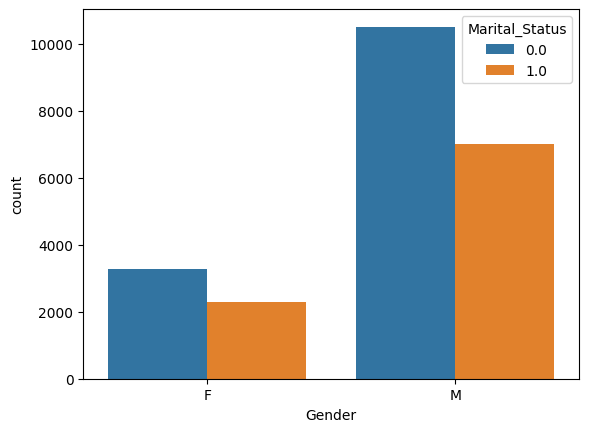

In [61]:
sns.countplot(data=df , x="Gender" , hue = "Marital_Status")

<Axes: title={'center': 'AVERAGE PURCHASE AMOUNT RATIO'}, ylabel='Purchase'>

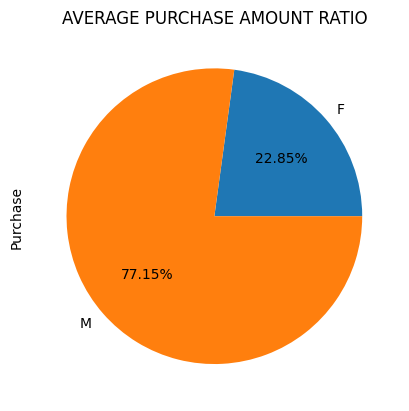

In [53]:
df.groupby("Gender").sum()["Purchase"].plot(kind="pie" , autopct  = "%2.2f%%" , title = "AVERAGE PURCHASE AMOUNT RATIO")

# **ANALYSING BASED ON AGE**

<Axes: title={'center': 'Number Of Purchases'}, xlabel='Age'>

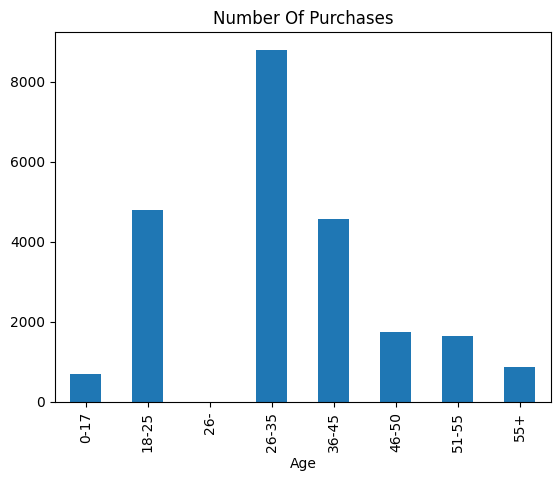

In [54]:
df.groupby('Age').size().plot(kind='bar',title = "Number Of Purchases")

<Axes: title={'center': 'Total Amount Of Purchases'}, xlabel='Age'>

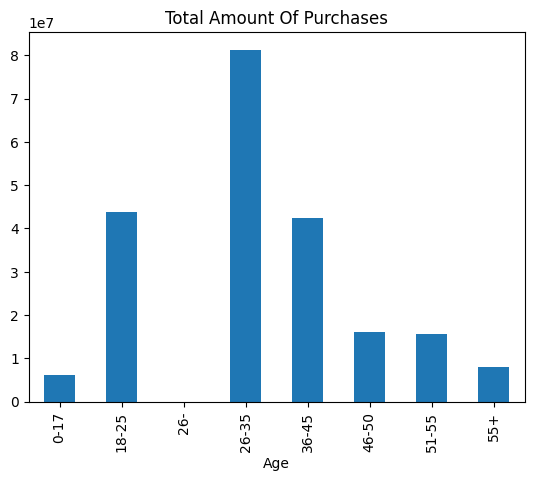

In [55]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',title = "Total Amount Of Purchases")

In [56]:
for i in df['Age'].unique():
  print(i , len(df[df['Age'] == i]))


0-17 678
55+ 876
26-35 8799
46-50 1736
51-55 1634
36-45 4576
18-25 4787
26- 1


In [57]:
products = []
for i in df['Age'].unique():
  products.append([i , df[df['Age']== i]['Product_ID'].nunique()])
products

[['0-17', 501],
 ['55+', 624],
 ['26-35', 2142],
 ['46-50', 1053],
 ['51-55', 976],
 ['36-45', 1706],
 ['18-25', 1635],
 ['26-', 1]]

In [58]:
data = pd.DataFrame(products , columns = ['Age' , 'Unique Products'])
data

,Age,Unique Products
0,0-17,501
1,55+,624
2,26-35,2142
3,46-50,1053
4,51-55,976
5,36-45,1706
6,18-25,1635
7,26-,1


<Axes: xlabel='Age'>

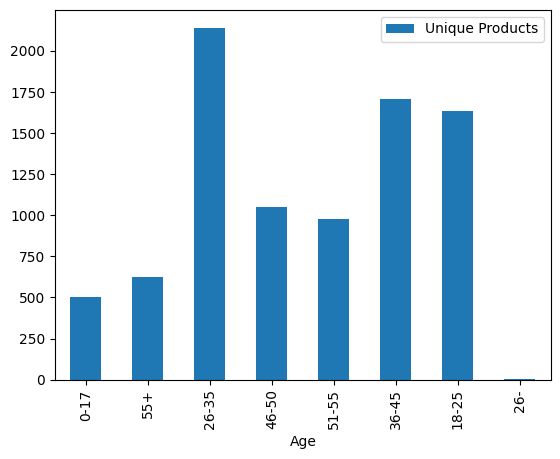

In [59]:
data.plot(kind='bar' , x = 'Age' , y = 'Unique Products')

<Axes: xlabel='Age', ylabel='count'>

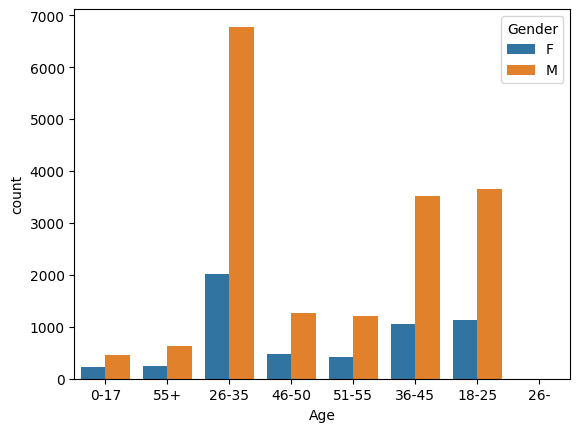

In [60]:
sns.countplot(data=df , x="Age" , hue = "Gender")

# **ANALYSIS BASED ON CITY_CATEGORY**



<Axes: title={'center': 'NUMBER OF PURCHASES IN EACH CITY'}>

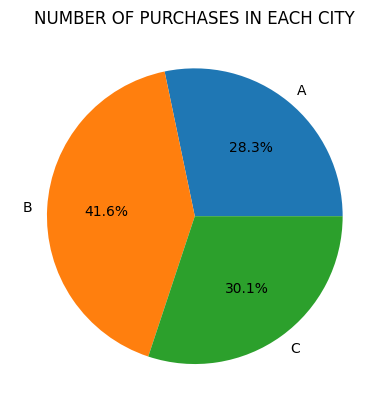

In [62]:
df.groupby('City_Category').size().plot(kind='pie' , title = "NUMBER OF PURCHASES IN EACH CITY" , autopct = "%1.1f%%")

<Axes: title={'center': 'TOTAL AMOUNT OF PURCHASES IN EACH CITY'}, ylabel='Purchase'>

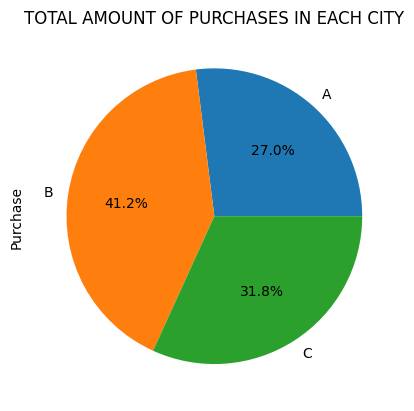

In [63]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie' , title = "TOTAL AMOUNT OF PURCHASES IN EACH CITY" , autopct = "%1.1f%%")

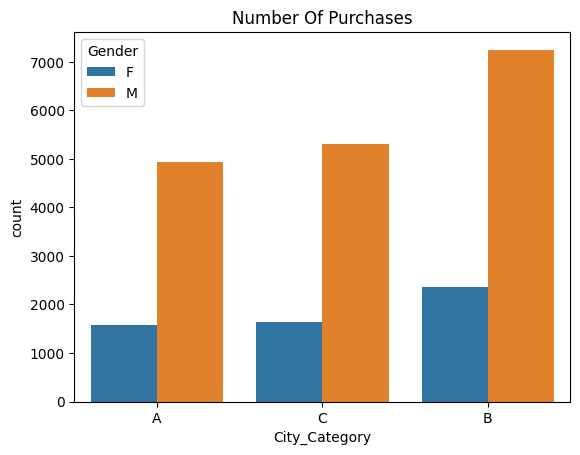

In [64]:
import matplotlib.pyplot as plt
sns.countplot(data=df, x="City_Category", hue='Gender')
plt.title('Number Of Purchases')
plt.show()

<Axes: title={'center': 'TOTAL PURCHASE IN EACH CITY'}, xlabel='City_Category'>

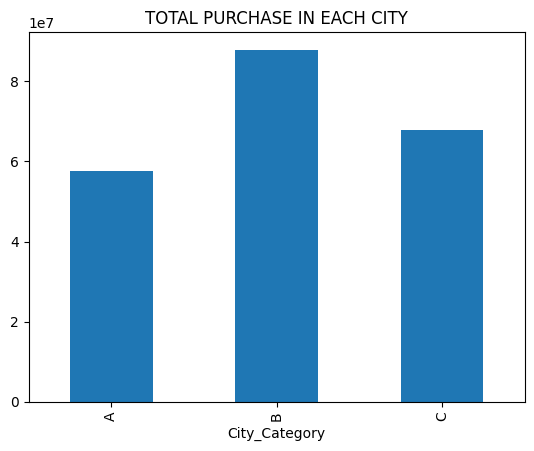

In [65]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='bar' , title = "TOTAL PURCHASE IN EACH CITY")

# **ANALYSES BASED ON YEARS OF STAY IN CURRENT CITY**

<Axes: >

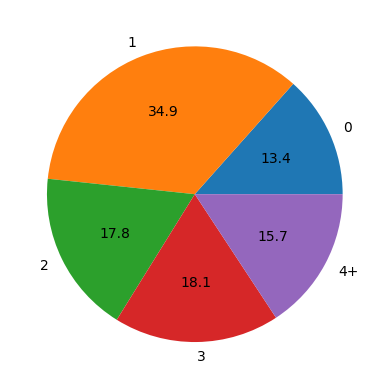

In [72]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%.1f" ,)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

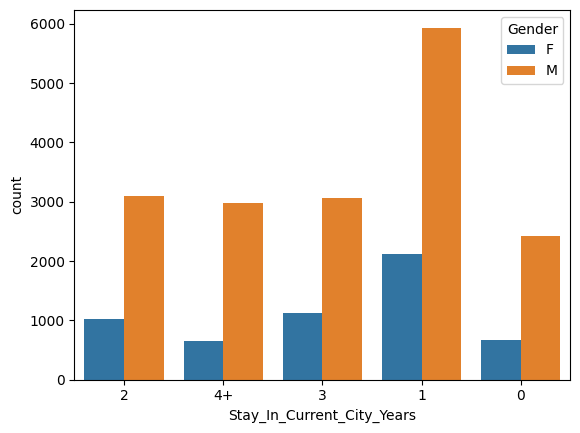

In [67]:
sns.countplot( x = 'Stay_In_Current_City_Years' , data = df , hue = 'Gender')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

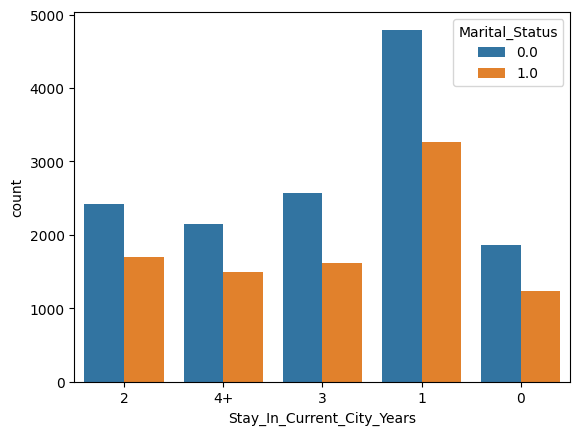

In [70]:
sns.countplot( x = 'Stay_In_Current_City_Years' , data = df , hue = 'Marital_Status')

<Axes: xlabel='Stay_In_Current_City_Years'>

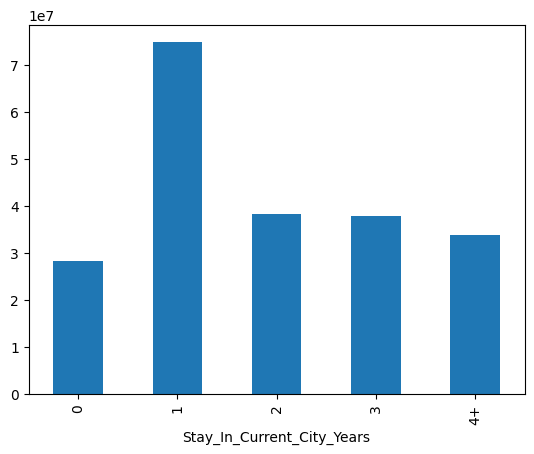

In [73]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

# **ANALYSES BASED ON OCCUPATION**

<Axes: xlabel='Occupation', ylabel='count'>

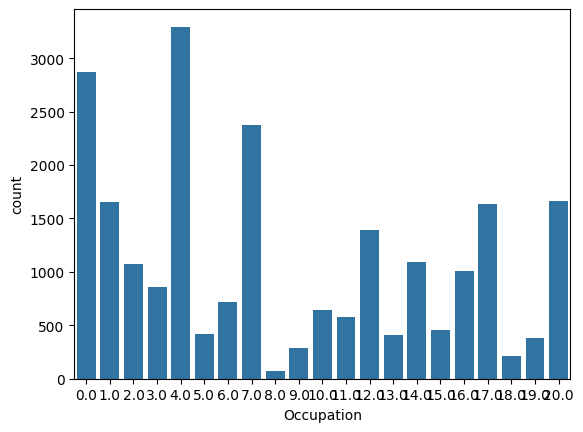

In [74]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

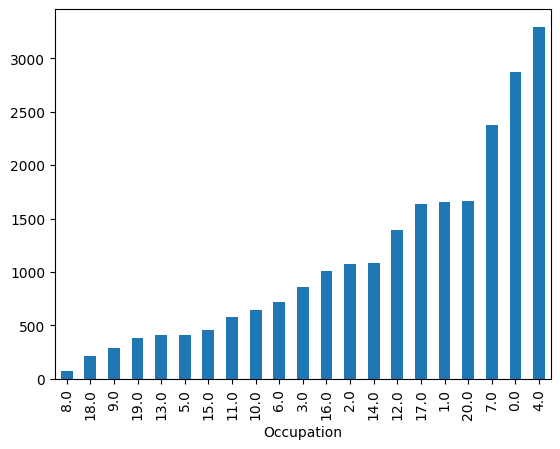

In [75]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

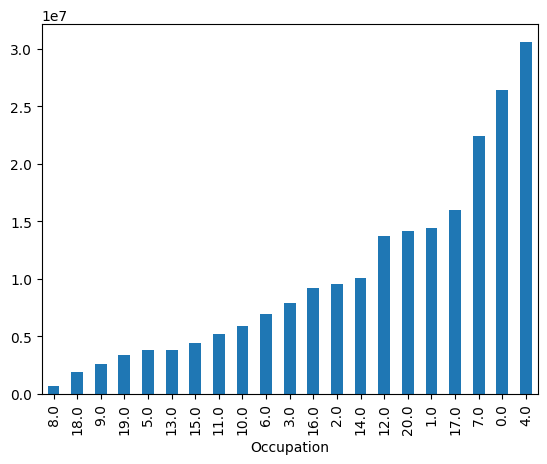

In [76]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

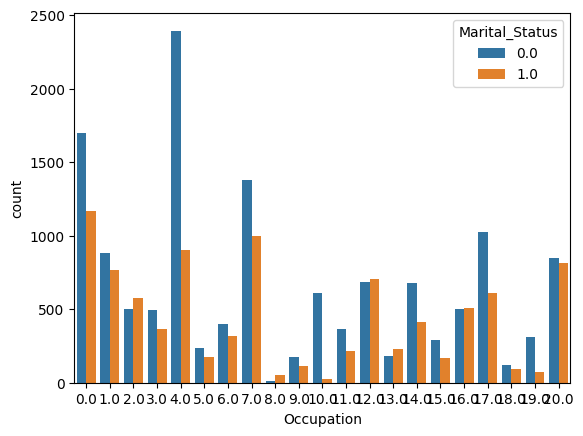

In [77]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

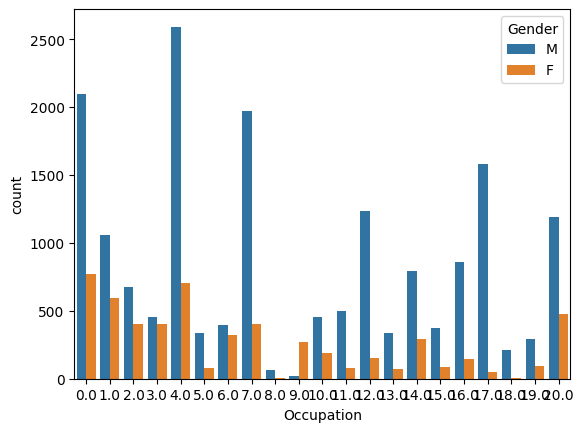

In [78]:

sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

# **ANALYSIS BASED ON PRODUCT CATEGORY 1**

<Axes: xlabel='Product_Category_1', ylabel='count'>

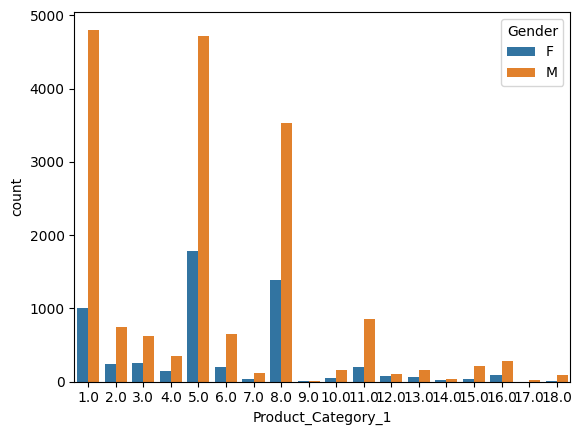

In [81]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

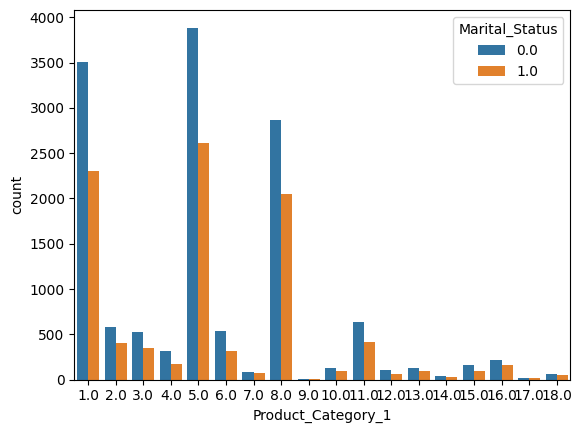

In [82]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

<Axes: xlabel='Product_Category_1'>

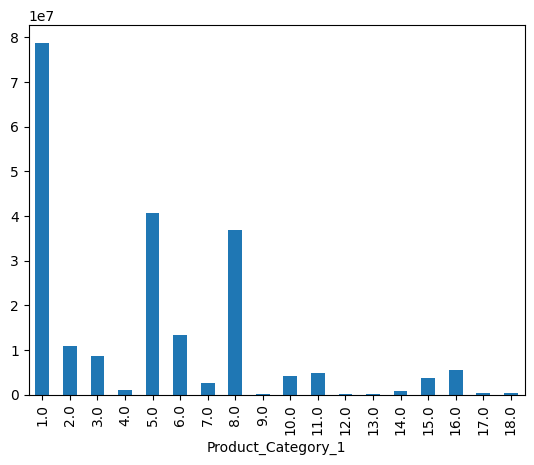

In [85]:
df.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar')

# **ANALYSES BASED ON AGE AND GENDER COMBINED**

In [86]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

<Axes: xlabel='MaritalGender', ylabel='count'>

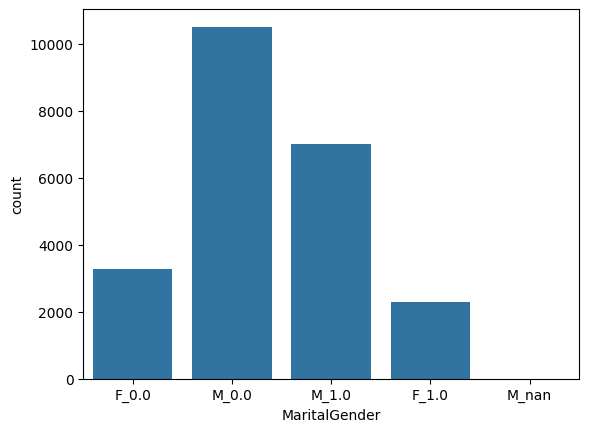

In [87]:
sns.countplot(x = df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

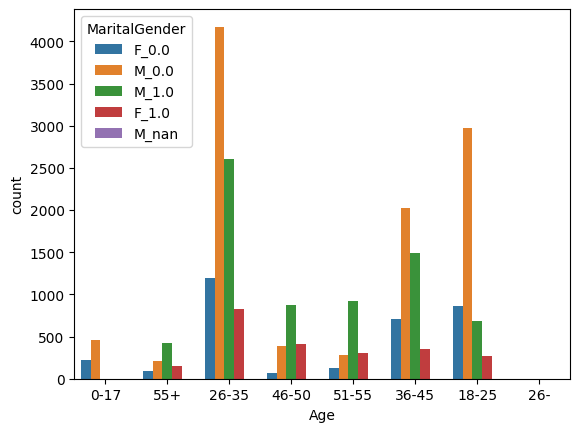

In [88]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

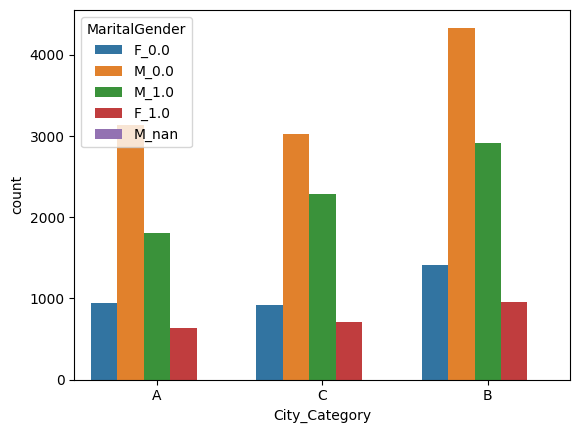

In [89]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])